In [2]:
import pandas as pd
import math
import statistics
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('anonymised_data.csv')
data = pd.DataFrame(data)
data.head()

,DOB,operation date,Date of death,Gender,Pe-op Euroqol exam_date,Euroqol mobility,Euroqol self care,Euroqol activities,Euroqol pain,Euroqol anxiety,...,Post-op EQ5d 6m - 2yrs,6m-2yr mobility,6m-2yr self_care,6m-2yr activities,6m-2yr pain,6m-2yr anxiety,6m-2yr self_score,Unnamed: 77,Complications,Unnamed: 79
0,10/12/1954,19/06/2003,- -,F,- -,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,NaN
1,10/09/1932,02/05/2008,- -,M,23/04/2008,02=I have some problems in walking about,02=I have some problems washing and dressing m...,02=I have some problems with performing my usu...,02=I have moderate pain or discomfort,01=I am not anxious or depressed,...,NaN,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,NaN
2,07/05/1929,24/10/2000,25/02/2015,F,- -,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,100.0,NaN,30/10/2000: [(_C) Non Hip related] 19=Cardiova...,NaN
3,28/01/1955,22/04/2010,- -,F,21/04/2010,02=I have some problems in walking about,01=I have no problems with self-care,02=I have some problems with performing my usu...,03=I have extreme pain or discomfort,01=I am not anxious or depressed,...,0.69,1.0,1.0,2.0,2.0,1.0,60.0,NaN,NaN,NaN
4,11/04/1930,22/03/2012,- -,F,14/03/2012,02=I have some problems in walking about,02=I have some problems washing and dressing m...,03=I am unable to perform my usual activities,02=I have moderate pain or discomfort,02=I am moderately anxious or depressed,...,0.59,2.0,1.0,2.0,2.0,2.0,70.0,NaN,NaN,NaN


In [4]:
df1 = data[['DOB', 'Date of death', 'Gender', 'OHS 1 pre-op Pain', 'OHS 2 pre-op washing', 
           'OHS 3 pre-op pub transport', 'OHS 4 pre-op Socks', 'OHS 5 pre-op Shopping', 'OHS 6 pre-op Walking',
           'OHS 7 pre-op Stairs', 'OHS 8 pre-op Chair', 'OHS 9 pre-op Limp', 'OHS 10 pre-op Severe pain',
           'OHS 11 pre-op Work', 'OHS 12 pre-op night pain', 'new pre op OHS']]
#df1.head()
df1

,DOB,Date of death,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS
0,10/12/1954,- -,F,1,1,2,1,2,3,2,1,2,3,2,0,20.0
1,10/09/1932,- -,M,1,2,2,1,2,2,2,2,0,2,1,0,17.0
2,07/05/1929,25/02/2015,F,0,3,2,3,2,2,1,2,1,2,2,0,20.0
3,28/01/1955,- -,F,0,1,1,1,1,2,2,3,0,2,1,1,15.0
4,11/04/1930,- -,F,1,2,2,1,1,1,2,1,1,3,0,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,18/04/1937,- -,M,2,4,4,3,4,3,4,4,1,4,2,1,36.0
2354,01/03/1938,- -,F,1,4,3,3,3,2,3,3,3,2,3,2,32.0
2355,29/06/1968,- -,M,1,2,2,1,2,3,2,1,0,0,1,0,15.0
2356,05/09/1940,- -,M,0,4,2,2,4,4,3,0,4,0,2,0,25.0


In [5]:
df1['dob'] = pd.to_datetime(df1['DOB'], errors='coerce')
now = pd.to_datetime('now')
df1['Age'] = (now - df1['dob']).astype('<m8[Y]') 

/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_989/3539750625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['dob'] = pd.to_datetime(df1['DOB'], errors='coerce')
/var/folders/_t/dvn8f3w52vn45l2jjvw6b6_c0000gn/T/ipykernel_989/3539750625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = (now - df1['dob']).astype('<m8[Y]')


In [6]:
df1 = df1[['DOB', 'Date of death', 'Age','Gender', 'OHS 1 pre-op Pain', 'OHS 2 pre-op washing', 
           'OHS 3 pre-op pub transport', 'OHS 4 pre-op Socks', 'OHS 5 pre-op Shopping', 'OHS 6 pre-op Walking',
           'OHS 7 pre-op Stairs', 'OHS 8 pre-op Chair', 'OHS 9 pre-op Limp', 'OHS 10 pre-op Severe pain',
           'OHS 11 pre-op Work', 'OHS 12 pre-op night pain', 'new pre op OHS']]
df1

,DOB,Date of death,Age,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS
0,10/12/1954,- -,67.0,F,1,1,2,1,2,3,2,1,2,3,2,0,20.0
1,10/09/1932,- -,89.0,M,1,2,2,1,2,2,2,2,0,2,1,0,17.0
2,07/05/1929,25/02/2015,93.0,F,0,3,2,3,2,2,1,2,1,2,2,0,20.0
3,28/01/1955,- -,67.0,F,0,1,1,1,1,2,2,3,0,2,1,1,15.0
4,11/04/1930,- -,91.0,F,1,2,2,1,1,1,2,1,1,3,0,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,18/04/1937,- -,85.0,M,2,4,4,3,4,3,4,4,1,4,2,1,36.0
2354,01/03/1938,- -,84.0,F,1,4,3,3,3,2,3,3,3,2,3,2,32.0
2355,29/06/1968,- -,54.0,M,1,2,2,1,2,3,2,1,0,0,1,0,15.0
2356,05/09/1940,- -,82.0,M,0,4,2,2,4,4,3,0,4,0,2,0,25.0


In [7]:
df2 = pd.DataFrame(columns = ['DOB', 'Date of death', 'Gender', 'OHS 1 pre-op Pain', 'OHS 2 pre-op washing', 
           'OHS 3 pre-op pub transport', 'OHS 4 pre-op Socks', 'OHS 5 pre-op Shopping', 'OHS 6 pre-op Walking',
           'OHS 7 pre-op Stairs', 'OHS 8 pre-op Chair', 'OHS 9 pre-op Limp', 'OHS 10 pre-op Severe pain',
           'OHS 11 pre-op Work', 'OHS 12 pre-op night pain', 'new pre op OHS'], index=range(8000))
df2

,DOB,Date of death,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


import numpy as np
random_data = np.random.randint(0,5,size=(8000,12))
df_2 = pd.DataFrame(data, columns=['OHS 1 pre-op Pain', 'OHS 2 pre-op washing', 
           'OHS 3 pre-op pub transport', 'OHS 4 pre-op Socks', 'OHS 5 pre-op Shopping', 'OHS 6 pre-op Walking',
           'OHS 7 pre-op Stairs', 'OHS 8 pre-op Chair', 'OHS 9 pre-op Limp', 'OHS 10 pre-op Severe pain',
           'OHS 11 pre-op Work', 'OHS 12 pre-op night pain'])

df2 = df_2[['OHS 1 pre-op Pain', 'OHS 2 pre-op washing', 
           'OHS 3 pre-op pub transport', 'OHS 4 pre-op Socks', 'OHS 5 pre-op Shopping', 'OHS 6 pre-op Walking',
           'OHS 7 pre-op Stairs', 'OHS 8 pre-op Chair', 'OHS 9 pre-op Limp', 'OHS 10 pre-op Severe pain',
           'OHS 11 pre-op Work', 'OHS 12 pre-op night pain']]

In [8]:
def random_datetimes_or_dates(start, end, out_format='datetime', n=8000): 


    (divide_by, unit) = (10**9, 's') if out_format=='datetime' else (24*60*60*10**9, 'D')

    start_u = start.value//divide_by
    end_u = end.value//divide_by

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit=unit) 

In [9]:
start = pd.to_datetime('1909-01-01')
end = pd.to_datetime('2012-12-31')
random_datetimes_or_dates(start, end, out_format='not datetime')
#split the dates to get the rows

DatetimeIndex(['2007-02-25', '1914-06-30', '1981-01-09', '1998-06-04',
               '1978-08-08', '1953-12-13', '1959-11-06', '1947-07-16',
               '1935-06-23', '1949-09-01',
               ...
               '1964-06-09', '1948-03-26', '1931-10-08', '2002-06-12',
               '1918-12-05', '2000-11-19', '1931-01-07', '2011-10-24',
               '1946-12-25', '2007-04-03'],
              dtype='datetime64[ns]', length=8000, freq=None)

In [10]:
dates = random_datetimes_or_dates(start, end, out_format='not datetime')

In [11]:
df2['DOB'] = pd.DataFrame(dates)

In [12]:
gender_series = df2.Gender.apply(lambda x: random.choice(['M', 'F'])) 
df2['Gender'] = gender_series

In [13]:
import numpy as np
X1 = np.random.randint(low=0, high=5, size=(8000)) # Put a seed in
X2 = np.random.randint(low=0, high=5, size=(8000))
X3 = np.random.randint(low=0, high=5, size=(8000))
X4 = np.random.randint(low=0, high=5, size=(8000))
X5 = np.random.randint(low=0, high=5, size=(8000))
X6 = np.random.randint(low=0, high=5, size=(8000))
X7 = np.random.randint(low=0, high=5, size=(8000))
X8 = np.random.randint(low=0, high=5, size=(8000))
X9 = np.random.randint(low=0, high=5, size=(8000))
X10 = np.random.randint(low=0, high=5, size=(8000))
X11 = np.random.randint(low=0, high=5, size=(8000))
X12= np.random.randint(low=0, high=5, size=(8000))

In [14]:
def randomise():
    pass

In [15]:
df2['OHS 1 pre-op Pain'] = X1
df2['OHS 2 pre-op washing'] = X2
df2['OHS 3 pre-op pub transport'] = X3
df2['OHS 4 pre-op Socks'] = X4
df2['OHS 5 pre-op Shopping'] = X5
df2['OHS 6 pre-op Walking'] = X6
df2['OHS 7 pre-op Stairs'] = X7
df2['OHS 8 pre-op Chair'] = X8
df2['OHS 9 pre-op Limp'] = X9
df2['OHS 10 pre-op Severe pain'] = X10
df2['OHS 11 pre-op Work'] = X11
df2['OHS 12 pre-op night pain'] = X12

In [16]:
df2['new pre op OHS']=df2.iloc[:,3:15].sum(axis=1)

In [17]:
#df2['Date of death'] = pd.DataFrame(date_of_death)
df2['dob'] = pd.to_datetime(df2['DOB'], errors='coerce')

In [18]:
now = pd.to_datetime('now')
now

Timestamp('2022-07-06 06:13:05.015048')

In [19]:
df2['Age'] = (now - df2['dob']).astype('<m8[Y]') 

In [20]:
## Gotta randomise the date of death!

In [21]:
df2

,DOB,Date of death,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS,dob,Age
0,2002-09-16,NaN,M,0,0,0,2,1,4,3,1,1,1,1,0,14,2002-09-16,19.0
1,2010-04-23,NaN,M,1,1,0,0,1,1,1,1,3,4,3,0,16,2010-04-23,12.0
2,1925-08-19,NaN,F,0,4,4,4,4,0,3,0,2,0,2,2,25,1925-08-19,96.0
3,1950-04-02,NaN,M,2,2,1,0,2,1,1,3,2,1,1,3,19,1950-04-02,72.0
4,1951-03-24,NaN,M,0,0,0,4,0,1,4,0,4,4,2,4,23,1951-03-24,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1996-04-21,NaN,F,4,0,4,2,1,0,3,0,3,3,4,2,26,1996-04-21,26.0
7996,1998-03-30,NaN,F,0,4,3,0,2,1,2,1,2,2,4,1,22,1998-03-30,24.0
7997,1998-09-20,NaN,F,1,2,4,0,0,2,0,0,2,3,1,2,17,1998-09-20,23.0
7998,2011-02-04,NaN,F,1,3,4,3,4,0,2,4,0,0,1,1,23,2011-02-04,11.0


In [22]:
df2 = df2[['DOB', 'Date of death', 'Age', 'Gender', 'OHS 1 pre-op Pain', 'OHS 2 pre-op washing', 
           'OHS 3 pre-op pub transport', 'OHS 4 pre-op Socks', 'OHS 5 pre-op Shopping', 'OHS 6 pre-op Walking',
           'OHS 7 pre-op Stairs', 'OHS 8 pre-op Chair', 'OHS 9 pre-op Limp', 'OHS 10 pre-op Severe pain',
           'OHS 11 pre-op Work', 'OHS 12 pre-op night pain', 'new pre op OHS']]
df2

,DOB,Date of death,Age,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS
0,2002-09-16,NaN,19.0,M,0,0,0,2,1,4,3,1,1,1,1,0,14
1,2010-04-23,NaN,12.0,M,1,1,0,0,1,1,1,1,3,4,3,0,16
2,1925-08-19,NaN,96.0,F,0,4,4,4,4,0,3,0,2,0,2,2,25
3,1950-04-02,NaN,72.0,M,2,2,1,0,2,1,1,3,2,1,1,3,19
4,1951-03-24,NaN,71.0,M,0,0,0,4,0,1,4,0,4,4,2,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1996-04-21,NaN,26.0,F,4,0,4,2,1,0,3,0,3,3,4,2,26
7996,1998-03-30,NaN,24.0,F,0,4,3,0,2,1,2,1,2,2,4,1,22
7997,1998-09-20,NaN,23.0,F,1,2,4,0,0,2,0,0,2,3,1,2,17
7998,2011-02-04,NaN,11.0,F,1,3,4,3,4,0,2,4,0,0,1,1,23


In [23]:
#n = 8000
#a_bar = 2; a_sd = 1
#b_bar = 2; b_sd = 1
#df2 = pd.DataFrame(dict(a=np.random.normal(a_bar, a_sd, size=n),
#                       b=np.random.normal(b_bar, b_sd, size=n)),
#                  columns=['OHS 1 pre-op Pain', 'OHS 2 pre-op washing'])

In [24]:
df1 = df1[['Age', 'Gender', 'OHS 1 pre-op Pain', 'OHS 2 pre-op washing', 
           'OHS 3 pre-op pub transport', 'OHS 4 pre-op Socks', 'OHS 5 pre-op Shopping', 'OHS 6 pre-op Walking',
           'OHS 7 pre-op Stairs', 'OHS 8 pre-op Chair', 'OHS 9 pre-op Limp', 'OHS 10 pre-op Severe pain',
           'OHS 11 pre-op Work', 'OHS 12 pre-op night pain', 'new pre op OHS']]
df1

,Age,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS
0,67.0,F,1,1,2,1,2,3,2,1,2,3,2,0,20.0
1,89.0,M,1,2,2,1,2,2,2,2,0,2,1,0,17.0
2,93.0,F,0,3,2,3,2,2,1,2,1,2,2,0,20.0
3,67.0,F,0,1,1,1,1,2,2,3,0,2,1,1,15.0
4,91.0,F,1,2,2,1,1,1,2,1,1,3,0,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,85.0,M,2,4,4,3,4,3,4,4,1,4,2,1,36.0
2354,84.0,F,1,4,3,3,3,2,3,3,3,2,3,2,32.0
2355,54.0,M,1,2,2,1,2,3,2,1,0,0,1,0,15.0
2356,82.0,M,0,4,2,2,4,4,3,0,4,0,2,0,25.0


In [25]:
df2 = df2[['Age', 'Gender', 'OHS 1 pre-op Pain', 'OHS 2 pre-op washing', 
           'OHS 3 pre-op pub transport', 'OHS 4 pre-op Socks', 'OHS 5 pre-op Shopping', 'OHS 6 pre-op Walking',
           'OHS 7 pre-op Stairs', 'OHS 8 pre-op Chair', 'OHS 9 pre-op Limp', 'OHS 10 pre-op Severe pain',
           'OHS 11 pre-op Work', 'OHS 12 pre-op night pain', 'new pre op OHS']]
df2

,Age,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS
0,19.0,M,0,0,0,2,1,4,3,1,1,1,1,0,14
1,12.0,M,1,1,0,0,1,1,1,1,3,4,3,0,16
2,96.0,F,0,4,4,4,4,0,3,0,2,0,2,2,25
3,72.0,M,2,2,1,0,2,1,1,3,2,1,1,3,19
4,71.0,M,0,0,0,4,0,1,4,0,4,4,2,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,26.0,F,4,0,4,2,1,0,3,0,3,3,4,2,26
7996,24.0,F,0,4,3,0,2,1,2,1,2,2,4,1,22
7997,23.0,F,1,2,4,0,0,2,0,0,2,3,1,2,17
7998,11.0,F,1,3,4,3,4,0,2,4,0,0,1,1,23


In [26]:
df = pd.merge(df1, df2, on=['Age' ,'Gender', 'new pre op OHS', ],how='inner', indicator='Exist')
df


,Age,Gender,OHS 1 pre-op Pain_x,OHS 2 pre-op washing_x,OHS 3 pre-op pub transport_x,OHS 4 pre-op Socks_x,OHS 5 pre-op Shopping_x,OHS 6 pre-op Walking_x,OHS 7 pre-op Stairs_x,OHS 8 pre-op Chair_x,...,OHS 4 pre-op Socks_y,OHS 5 pre-op Shopping_y,OHS 6 pre-op Walking_y,OHS 7 pre-op Stairs_y,OHS 8 pre-op Chair_y,OHS 9 pre-op Limp_y,OHS 10 pre-op Severe pain_y,OHS 11 pre-op Work_y,OHS 12 pre-op night pain_y,Exist
0,67.0,F,1,1,2,1,2,3,2,1,...,2,1,4,4,0,4,1,1,0,both
1,67.0,F,1,1,2,1,2,3,2,1,...,0,0,4,3,3,2,3,0,0,both
2,67.0,F,1,1,2,1,2,3,2,1,...,4,4,0,0,1,2,1,1,1,both
3,67.0,F,1,2,1,1,0,1,2,3,...,2,1,4,4,0,4,1,1,0,both
4,67.0,F,1,2,1,1,0,1,2,3,...,0,0,4,3,3,2,3,0,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,53.0,F,0,2,2,2,1,2,2,2,...,3,0,2,0,0,1,2,4,0,both
3239,84.0,F,1,4,3,3,3,2,3,3,...,4,3,2,3,1,1,4,3,1,both
3240,84.0,F,1,4,3,3,3,2,3,3,...,3,1,2,3,3,4,2,4,2,both
3241,82.0,M,0,4,2,2,4,4,3,0,...,4,2,3,4,2,0,4,1,0,both


In [27]:
df['Exist'] = np.where(df.Exist == 'both' , 1, 0)
df = pd.DataFrame(df)
df

,Age,Gender,OHS 1 pre-op Pain_x,OHS 2 pre-op washing_x,OHS 3 pre-op pub transport_x,OHS 4 pre-op Socks_x,OHS 5 pre-op Shopping_x,OHS 6 pre-op Walking_x,OHS 7 pre-op Stairs_x,OHS 8 pre-op Chair_x,...,OHS 4 pre-op Socks_y,OHS 5 pre-op Shopping_y,OHS 6 pre-op Walking_y,OHS 7 pre-op Stairs_y,OHS 8 pre-op Chair_y,OHS 9 pre-op Limp_y,OHS 10 pre-op Severe pain_y,OHS 11 pre-op Work_y,OHS 12 pre-op night pain_y,Exist
0,67.0,F,1,1,2,1,2,3,2,1,...,2,1,4,4,0,4,1,1,0,1
1,67.0,F,1,1,2,1,2,3,2,1,...,0,0,4,3,3,2,3,0,0,1
2,67.0,F,1,1,2,1,2,3,2,1,...,4,4,0,0,1,2,1,1,1,1
3,67.0,F,1,2,1,1,0,1,2,3,...,2,1,4,4,0,4,1,1,0,1
4,67.0,F,1,2,1,1,0,1,2,3,...,0,0,4,3,3,2,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,53.0,F,0,2,2,2,1,2,2,2,...,3,0,2,0,0,1,2,4,0,1
3239,84.0,F,1,4,3,3,3,2,3,3,...,4,3,2,3,1,1,4,3,1,1
3240,84.0,F,1,4,3,3,3,2,3,3,...,3,1,2,3,3,4,2,4,2,1
3241,82.0,M,0,4,2,2,4,4,3,0,...,4,2,3,4,2,0,4,1,0,1


In [28]:
same_values = df[df['Exist'] == 1]
same_values

,Age,Gender,OHS 1 pre-op Pain_x,OHS 2 pre-op washing_x,OHS 3 pre-op pub transport_x,OHS 4 pre-op Socks_x,OHS 5 pre-op Shopping_x,OHS 6 pre-op Walking_x,OHS 7 pre-op Stairs_x,OHS 8 pre-op Chair_x,...,OHS 4 pre-op Socks_y,OHS 5 pre-op Shopping_y,OHS 6 pre-op Walking_y,OHS 7 pre-op Stairs_y,OHS 8 pre-op Chair_y,OHS 9 pre-op Limp_y,OHS 10 pre-op Severe pain_y,OHS 11 pre-op Work_y,OHS 12 pre-op night pain_y,Exist
0,67.0,F,1,1,2,1,2,3,2,1,...,2,1,4,4,0,4,1,1,0,1
1,67.0,F,1,1,2,1,2,3,2,1,...,0,0,4,3,3,2,3,0,0,1
2,67.0,F,1,1,2,1,2,3,2,1,...,4,4,0,0,1,2,1,1,1,1
3,67.0,F,1,2,1,1,0,1,2,3,...,2,1,4,4,0,4,1,1,0,1
4,67.0,F,1,2,1,1,0,1,2,3,...,0,0,4,3,3,2,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,53.0,F,0,2,2,2,1,2,2,2,...,3,0,2,0,0,1,2,4,0,1
3239,84.0,F,1,4,3,3,3,2,3,3,...,4,3,2,3,1,1,4,3,1,1
3240,84.0,F,1,4,3,3,3,2,3,3,...,3,1,2,3,3,4,2,4,2,1
3241,82.0,M,0,4,2,2,4,4,3,0,...,4,2,3,4,2,0,4,1,0,1


In [29]:
different_values = df[df['Exist'] == 0]
different_values

,Age,Gender,OHS 1 pre-op Pain_x,OHS 2 pre-op washing_x,OHS 3 pre-op pub transport_x,OHS 4 pre-op Socks_x,OHS 5 pre-op Shopping_x,OHS 6 pre-op Walking_x,OHS 7 pre-op Stairs_x,OHS 8 pre-op Chair_x,...,OHS 4 pre-op Socks_y,OHS 5 pre-op Shopping_y,OHS 6 pre-op Walking_y,OHS 7 pre-op Stairs_y,OHS 8 pre-op Chair_y,OHS 9 pre-op Limp_y,OHS 10 pre-op Severe pain_y,OHS 11 pre-op Work_y,OHS 12 pre-op night pain_y,Exist


### Additional code

In [30]:
cols = ['Age','Gender', 'OHS 1 pre-op Pain', 'OHS 2 pre-op washing', 
           'OHS 3 pre-op pub transport', 'OHS 4 pre-op Socks', 'OHS 5 pre-op Shopping', 'OHS 6 pre-op Walking',
           'OHS 7 pre-op Stairs', 'OHS 8 pre-op Chair', 'OHS 9 pre-op Limp', 'OHS 10 pre-op Severe pain',
           'OHS 11 pre-op Work', 'OHS 12 pre-op night pain', 'new pre op OHS']

In [31]:
merged = pd.merge(df1[cols], df2, on=cols, how='outer', indicator=True)

In [32]:
merged

,Age,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS,_merge
0,67.0,F,1,1,2,1,2,3,2,1,2,3,2,0,20.0,left_only
1,89.0,M,1,2,2,1,2,2,2,2,0,2,1,0,17.0,left_only
2,93.0,F,0,3,2,3,2,2,1,2,1,2,2,0,20.0,left_only
3,67.0,F,0,1,1,1,1,2,2,3,0,2,1,1,15.0,left_only
4,91.0,F,1,2,2,1,1,1,2,1,1,3,0,1,16.0,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,26.0,F,4,0,4,2,1,0,3,0,3,3,4,2,26.0,right_only
10354,24.0,F,0,4,3,0,2,1,2,1,2,2,4,1,22.0,right_only
10355,23.0,F,1,2,4,0,0,2,0,0,2,3,1,2,17.0,right_only
10356,11.0,F,1,3,4,3,4,0,2,4,0,0,1,1,23.0,right_only


In [33]:
merged = merged[merged['_merge'] == 'both']
merged

,Age,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS,_merge


In [34]:
mask = (df2[cols].isin(df1[cols])).all(axis=1)

In [35]:
df2[mask]

,Age,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS


In [36]:
t = df2.merge(df1,'inner', on=cols)
t

,Age,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS


In [37]:
i1 = pd.MultiIndex.from_frame(df1)
i2 = pd.MultiIndex.from_frame(df2)

df1, df2 = df1[~i1.isin(i2)], df2[~i2.isin(i1)]

In [38]:
df1, df2 = df1[~df1.isin(df2).all(axis=1)], df2[~df2.isin(df1).all(axis=1)]

In [39]:
df1

,Age,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS
0,67.0,F,1,1,2,1,2,3,2,1,2,3,2,0,20.0
1,89.0,M,1,2,2,1,2,2,2,2,0,2,1,0,17.0
2,93.0,F,0,3,2,3,2,2,1,2,1,2,2,0,20.0
3,67.0,F,0,1,1,1,1,2,2,3,0,2,1,1,15.0
4,91.0,F,1,2,2,1,1,1,2,1,1,3,0,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,85.0,M,2,4,4,3,4,3,4,4,1,4,2,1,36.0
2354,84.0,F,1,4,3,3,3,2,3,3,3,2,3,2,32.0
2355,54.0,M,1,2,2,1,2,3,2,1,0,0,1,0,15.0
2356,82.0,M,0,4,2,2,4,4,3,0,4,0,2,0,25.0


In [40]:
df2

,Age,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS
0,19.0,M,0,0,0,2,1,4,3,1,1,1,1,0,14
1,12.0,M,1,1,0,0,1,1,1,1,3,4,3,0,16
2,96.0,F,0,4,4,4,4,0,3,0,2,0,2,2,25
3,72.0,M,2,2,1,0,2,1,1,3,2,1,1,3,19
4,71.0,M,0,0,0,4,0,1,4,0,4,4,2,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,26.0,F,4,0,4,2,1,0,3,0,3,3,4,2,26
7996,24.0,F,0,4,3,0,2,1,2,1,2,2,4,1,22
7997,23.0,F,1,2,4,0,0,2,0,0,2,3,1,2,17
7998,11.0,F,1,3,4,3,4,0,2,4,0,0,1,1,23


In [41]:
mu, sigma = 2, 1 
s1 = np.random.normal(1, 1, 8000)
s2 = np.random.normal(mu, sigma, 8000)
s3 = np.random.normal(mu, sigma, 8000)
s4 = np.random.normal(mu, sigma, 8000)
s5 = np.random.normal(mu, sigma, 8000)
s6 = np.random.normal(mu, sigma, 8000)
s7 = np.random.normal(mu, sigma, 8000)
s8 = np.random.normal(mu, sigma, 8000)
s9 = np.random.normal(mu, sigma, 8000)
s10 = np.random.normal(mu, sigma, 8000)
s11 = np.random.normal(mu, sigma, 8000)
s12 = np.random.normal(mu, sigma, 8000)

In [42]:
s1 = [np.round(x) for x in s1]
s2 = [np.round(x) for x in s2]
s3 = [np.round(x) for x in s3]
s4 = [np.round(x) for x in s4]
s5 = [np.round(x) for x in s5]
s6 = [np.round(x) for x in s6]
s7 = [np.round(x) for x in s7]
s8 = [np.round(x) for x in s8]
s9 = [np.round(x) for x in s9]
s10 = [np.round(x) for x in s10]
s11 = [np.round(x) for x in s11]
s12 = [np.round(x) for x in s12]

In [43]:
df3 = pd.DataFrame(columns = ['DOB', 'Date of death', 'Gender', 'OHS 1 pre-op Pain', 'OHS 2 pre-op washing', 
           'OHS 3 pre-op pub transport', 'OHS 4 pre-op Socks', 'OHS 5 pre-op Shopping', 'OHS 6 pre-op Walking',
           'OHS 7 pre-op Stairs', 'OHS 8 pre-op Chair', 'OHS 9 pre-op Limp', 'OHS 10 pre-op Severe pain',
           'OHS 11 pre-op Work', 'OHS 12 pre-op night pain', 'new pre op OHS'], index=range(8000))
df3

,DOB,Date of death,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
def random_datetimes_or_dates(start, end, out_format='datetime', n=8000): 


    (divide_by, unit) = (10**9, 's') if out_format=='datetime' else (24*60*60*10**9, 'D')

    start_u = start.value//divide_by
    end_u = end.value//divide_by

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit=unit) 

In [45]:
start = pd.to_datetime('1909-01-01')
end = pd.to_datetime('2012-12-31')
random_datetimes_or_dates(start, end, out_format='not datetime')

DatetimeIndex(['1999-10-25', '1921-04-10', '1921-03-23', '1945-01-19',
               '1966-06-14', '2009-01-25', '1965-01-28', '1913-09-23',
               '1955-04-17', '1962-03-12',
               ...
               '1949-01-20', '1998-01-07', '1978-03-29', '1912-11-14',
               '1955-06-07', '1941-04-14', '2007-06-30', '1927-07-21',
               '1909-12-29', '1923-03-30'],
              dtype='datetime64[ns]', length=8000, freq=None)

In [46]:
dates = random_datetimes_or_dates(start, end, out_format='not datetime')
df3['DOB'] = pd.DataFrame(dates)

In [47]:
gender_series = df3.Gender.apply(lambda x: random.choice(['M', 'F'])) 
df3['Gender'] = gender_series

In [48]:
df3['OHS 1 pre-op Pain'] = s1
df3['OHS 2 pre-op washing'] = s2
df3['OHS 3 pre-op pub transport'] = s3
df3['OHS 4 pre-op Socks'] = s4
df3['OHS 5 pre-op Shopping'] = s5
df3['OHS 6 pre-op Walking'] = s6
df3['OHS 7 pre-op Stairs'] = s7
df3['OHS 8 pre-op Chair'] = s8
df3['OHS 9 pre-op Limp'] = s9
df3['OHS 10 pre-op Severe pain'] = s10
df3['OHS 11 pre-op Work'] = s11
df3['OHS 12 pre-op night pain'] = s12

In [49]:
df3['new pre op OHS']=df3.iloc[:,3:15].sum(axis=1)

In [50]:
df3['dob'] = pd.to_datetime(df3['DOB'], errors='coerce')
now = pd.to_datetime('now')
df3['Age'] = (now - df3['dob']).astype('<m8[Y]') 

In [51]:
df3 = df3[['DOB', 'Date of death', 'Age', 'Gender', 'OHS 1 pre-op Pain', 'OHS 2 pre-op washing', 
           'OHS 3 pre-op pub transport', 'OHS 4 pre-op Socks', 'OHS 5 pre-op Shopping', 'OHS 6 pre-op Walking',
           'OHS 7 pre-op Stairs', 'OHS 8 pre-op Chair', 'OHS 9 pre-op Limp', 'OHS 10 pre-op Severe pain',
           'OHS 11 pre-op Work', 'OHS 12 pre-op night pain', 'new pre op OHS']]
df3

,DOB,Date of death,Age,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS
0,1944-04-25,NaN,78.0,F,3.0,1.0,1.0,2.0,0.0,3.0,2.0,3.0,3.0,1.0,2.0,2.0,23.0
1,1940-10-17,NaN,81.0,F,2.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,28.0
2,1991-11-07,NaN,30.0,M,2.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,4.0,1.0,29.0
3,1957-09-22,NaN,64.0,M,3.0,1.0,2.0,2.0,3.0,3.0,3.0,4.0,2.0,3.0,2.0,3.0,31.0
4,2000-05-12,NaN,22.0,M,1.0,0.0,2.0,1.0,3.0,2.0,2.0,3.0,2.0,1.0,2.0,4.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1920-01-23,NaN,102.0,M,0.0,2.0,2.0,2.0,1.0,2.0,0.0,3.0,2.0,2.0,2.0,3.0,21.0
7996,1993-04-10,NaN,29.0,F,0.0,1.0,3.0,-0.0,1.0,2.0,2.0,4.0,1.0,4.0,1.0,1.0,20.0
7997,1963-03-13,NaN,59.0,F,1.0,2.0,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,-0.0,3.0,26.0
7998,1911-09-23,NaN,110.0,F,1.0,4.0,1.0,2.0,1.0,2.0,3.0,2.0,2.0,1.0,4.0,1.0,24.0


In [52]:
df = pd.merge(df1, df3, on=['Age', 'Gender', 'new pre op OHS', 'OHS 1 pre-op Pain', 'OHS 2 pre-op washing', 
           'OHS 3 pre-op pub transport', 'OHS 4 pre-op Socks', 'OHS 5 pre-op Shopping', 'OHS 6 pre-op Walking',
           'OHS 7 pre-op Stairs', 'OHS 8 pre-op Chair', 'OHS 9 pre-op Limp', 'OHS 10 pre-op Severe pain',
           'OHS 11 pre-op Work', 'OHS 12 pre-op night pain'], how='inner', indicator='Exist')
df

,Age,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS,DOB,Date of death,Exist


In [53]:
merged1 = pd.merge(df1[cols], df3, on=cols, how='outer', indicator=True)

In [54]:
merged1

,Age,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS,DOB,Date of death,_merge
0,67.0,F,1.0,1.0,2.0,1.0,2.0,3.0,2.0,1.0,2.0,3.0,2.0,0.0,20.0,NaT,NaN,left_only
1,89.0,M,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,0.0,17.0,NaT,NaN,left_only
2,93.0,F,0.0,3.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,20.0,NaT,NaN,left_only
3,67.0,F,0.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,0.0,2.0,1.0,1.0,15.0,NaT,NaN,left_only
4,91.0,F,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,0.0,1.0,16.0,NaT,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,102.0,M,0.0,2.0,2.0,2.0,1.0,2.0,0.0,3.0,2.0,2.0,2.0,3.0,21.0,1920-01-23,NaN,right_only
10354,29.0,F,0.0,1.0,3.0,-0.0,1.0,2.0,2.0,4.0,1.0,4.0,1.0,1.0,20.0,1993-04-10,NaN,right_only
10355,59.0,F,1.0,2.0,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,-0.0,3.0,26.0,1963-03-13,NaN,right_only
10356,110.0,F,1.0,4.0,1.0,2.0,1.0,2.0,3.0,2.0,2.0,1.0,4.0,1.0,24.0,1911-09-23,NaN,right_only


In [55]:
df = pd.merge(df1, df3, on=['Age', 'Gender', 'new pre op OHS'], how='inner', indicator=True)
df

,Age,Gender,OHS 1 pre-op Pain_x,OHS 2 pre-op washing_x,OHS 3 pre-op pub transport_x,OHS 4 pre-op Socks_x,OHS 5 pre-op Shopping_x,OHS 6 pre-op Walking_x,OHS 7 pre-op Stairs_x,OHS 8 pre-op Chair_x,...,OHS 4 pre-op Socks_y,OHS 5 pre-op Shopping_y,OHS 6 pre-op Walking_y,OHS 7 pre-op Stairs_y,OHS 8 pre-op Chair_y,OHS 9 pre-op Limp_y,OHS 10 pre-op Severe pain_y,OHS 11 pre-op Work_y,OHS 12 pre-op night pain_y,_merge
0,67.0,F,1,1,2,1,2,3,2,1,...,1.0,3.0,3.0,-1.0,1.0,1.0,2.0,3.0,2.0,both
1,67.0,F,1,1,2,1,2,3,2,1,...,1.0,2.0,0.0,4.0,2.0,1.0,2.0,2.0,2.0,both
2,67.0,F,1,1,2,1,2,3,2,1,...,3.0,1.0,2.0,0.0,0.0,3.0,1.0,2.0,3.0,both
3,67.0,F,1,1,2,1,2,3,2,1,...,1.0,4.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,both
4,67.0,F,1,2,1,1,0,1,2,3,...,1.0,3.0,3.0,-1.0,1.0,1.0,2.0,3.0,2.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,56.0,M,1,3,2,2,4,3,3,2,...,2.0,1.0,1.0,2.0,0.0,1.0,2.0,2.0,1.0,both
3507,73.0,F,1,3,2,2,4,4,2,2,...,3.0,2.0,1.0,2.0,3.0,2.0,2.0,4.0,3.0,both
3508,53.0,F,0,2,2,2,1,2,2,2,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,3.0,both
3509,54.0,M,1,2,2,1,2,3,2,1,...,-2.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,2.0,both


In [56]:
df['Exist'] = np.where(df._merge == 'both' , 1, 0)
df = pd.DataFrame(df)
df

,Age,Gender,OHS 1 pre-op Pain_x,OHS 2 pre-op washing_x,OHS 3 pre-op pub transport_x,OHS 4 pre-op Socks_x,OHS 5 pre-op Shopping_x,OHS 6 pre-op Walking_x,OHS 7 pre-op Stairs_x,OHS 8 pre-op Chair_x,...,OHS 5 pre-op Shopping_y,OHS 6 pre-op Walking_y,OHS 7 pre-op Stairs_y,OHS 8 pre-op Chair_y,OHS 9 pre-op Limp_y,OHS 10 pre-op Severe pain_y,OHS 11 pre-op Work_y,OHS 12 pre-op night pain_y,_merge,Exist
0,67.0,F,1,1,2,1,2,3,2,1,...,3.0,3.0,-1.0,1.0,1.0,2.0,3.0,2.0,both,1
1,67.0,F,1,1,2,1,2,3,2,1,...,2.0,0.0,4.0,2.0,1.0,2.0,2.0,2.0,both,1
2,67.0,F,1,1,2,1,2,3,2,1,...,1.0,2.0,0.0,0.0,3.0,1.0,2.0,3.0,both,1
3,67.0,F,1,1,2,1,2,3,2,1,...,4.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,both,1
4,67.0,F,1,2,1,1,0,1,2,3,...,3.0,3.0,-1.0,1.0,1.0,2.0,3.0,2.0,both,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,56.0,M,1,3,2,2,4,3,3,2,...,1.0,1.0,2.0,0.0,1.0,2.0,2.0,1.0,both,1
3507,73.0,F,1,3,2,2,4,4,2,2,...,2.0,1.0,2.0,3.0,2.0,2.0,4.0,3.0,both,1
3508,53.0,F,0,2,2,2,1,2,2,2,...,1.0,2.0,1.0,1.0,1.0,1.0,0.0,3.0,both,1
3509,54.0,M,1,2,2,1,2,3,2,1,...,1.0,2.0,1.0,3.0,1.0,2.0,1.0,2.0,both,1


In [57]:
df_1 = pd.merge(df1, df3, on=['Gender', 'OHS 1 pre-op Pain', 'OHS 2 pre-op washing', 
           'OHS 3 pre-op pub transport', 'OHS 4 pre-op Socks', 'OHS 5 pre-op Shopping', 'OHS 6 pre-op Walking',
           'OHS 7 pre-op Stairs', 'OHS 8 pre-op Chair', 'OHS 9 pre-op Limp', 'OHS 10 pre-op Severe pain',
           'OHS 11 pre-op Work', 'OHS 12 pre-op night pain'], how='inner', indicator='Exist')
df_1

,Age_x,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS_x,DOB,Date of death,Age_y,new pre op OHS_y,Exist
0,71.0,F,1,3,2,2,2,3,3,2,1,3,2,3,27.0,1926-06-26,NaN,96.0,27.0,both
1,69.0,M,1,2,2,2,3,3,3,2,2,2,2,2,26.0,1948-04-28,NaN,74.0,26.0,both


In [58]:
#import datacompy
#compare = datacompy.Compare(df1, df2)

### Distributions

In [59]:
df1

,Age,Gender,OHS 1 pre-op Pain,OHS 2 pre-op washing,OHS 3 pre-op pub transport,OHS 4 pre-op Socks,OHS 5 pre-op Shopping,OHS 6 pre-op Walking,OHS 7 pre-op Stairs,OHS 8 pre-op Chair,OHS 9 pre-op Limp,OHS 10 pre-op Severe pain,OHS 11 pre-op Work,OHS 12 pre-op night pain,new pre op OHS
0,67.0,F,1,1,2,1,2,3,2,1,2,3,2,0,20.0
1,89.0,M,1,2,2,1,2,2,2,2,0,2,1,0,17.0
2,93.0,F,0,3,2,3,2,2,1,2,1,2,2,0,20.0
3,67.0,F,0,1,1,1,1,2,2,3,0,2,1,1,15.0
4,91.0,F,1,2,2,1,1,1,2,1,1,3,0,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,85.0,M,2,4,4,3,4,3,4,4,1,4,2,1,36.0
2354,84.0,F,1,4,3,3,3,2,3,3,3,2,3,2,32.0
2355,54.0,M,1,2,2,1,2,3,2,1,0,0,1,0,15.0
2356,82.0,M,0,4,2,2,4,4,3,0,4,0,2,0,25.0


In [60]:
df1['Age'].value_counts().describe()

count     79.000000
mean      29.848101
std       32.345526
min        1.000000
25%        4.000000
50%       16.000000
75%       43.000000
max      115.000000
Name: Age, dtype: float64

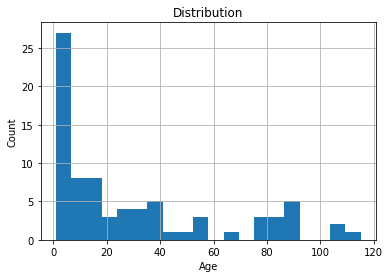

In [61]:
df1['Age'].value_counts().hist(bins = 20)
plt.title('Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [62]:
df1['Gender'].value_counts().describe()

count       2.000000
mean     1179.000000
std       261.629509
min       994.000000
25%      1086.500000
50%      1179.000000
75%      1271.500000
max      1364.000000
Name: Gender, dtype: float64

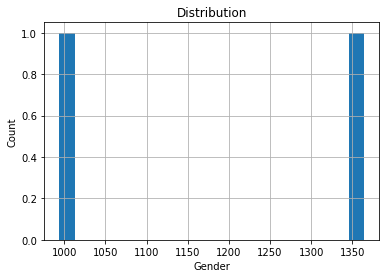

In [63]:
df1['Gender'].value_counts().hist(bins = 20)
plt.title('Distribution')
plt.xlabel('Gender')
plt.ylabel('Count') 
plt.show()

In [64]:
df1['OHS 1 pre-op Pain'].value_counts().describe()

count       5.000000
mean      471.600000
std       558.530483
min        10.000000
25%        47.000000
50%       166.000000
75%       908.000000
max      1227.000000
Name: OHS 1 pre-op Pain, dtype: float64

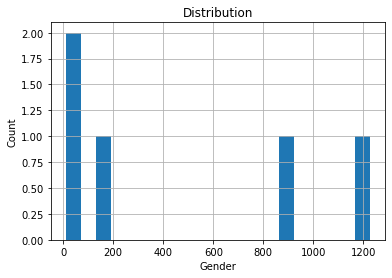

In [65]:
df1['OHS 1 pre-op Pain'].value_counts().hist(bins = 20)
plt.title('Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

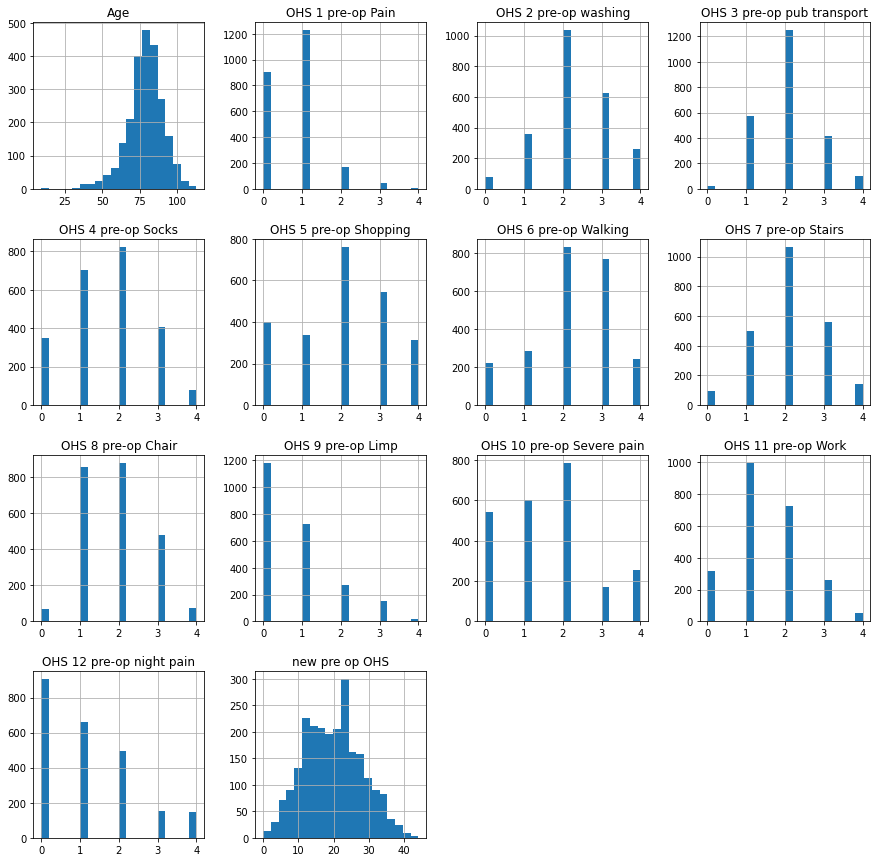

In [66]:
df1.hist(bins=20, figsize = (15,15))
plt.show();

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [68]:
for col in df1:
    print(col)

Age
Gender
OHS 1 pre-op Pain
OHS 2 pre-op washing
OHS 3 pre-op pub transport
OHS 4 pre-op Socks
OHS 5 pre-op Shopping
OHS 6 pre-op Walking
OHS 7 pre-op Stairs
OHS 8 pre-op Chair
OHS 9 pre-op Limp
OHS 10 pre-op Severe pain
OHS 11 pre-op Work
OHS 12 pre-op night pain
new pre op OHS


In [69]:
ohs1 = df1["OHS 1 pre-op Pain"].values
ohs2 = df1['OHS 2 pre-op washing'].values
ohs3 = df1['OHS 3 pre-op pub transport'].values
ohs4 = df1['OHS 4 pre-op Socks'].values
ohs5 = df1['OHS 5 pre-op Shopping'].values
ohs6 = df1['OHS 6 pre-op Walking'].values
ohs7 = df1['OHS 7 pre-op Stairs'].values
ohs8 = df1['OHS 8 pre-op Chair'].values
ohs9 = df1['OHS 9 pre-op Limp'].values
ohs10 = df1['OHS 10 pre-op Severe pain'].values
ohs11 = df1['OHS 11 pre-op Work'].values
ohs12 = df1['OHS 12 pre-op night pain'].values

,sumsquare_error,aic,bic,kl_div
beta,209.347241,770.971544,-5679.011021,inf
burr,216.416028,607.730919,-5600.705858,inf
gamma,225.836453,755.488987,-5508.000661,inf
lognorm,247.554080,873.355903,-5291.493851,inf
norm,254.104775,699.192293,-5237.674079,inf


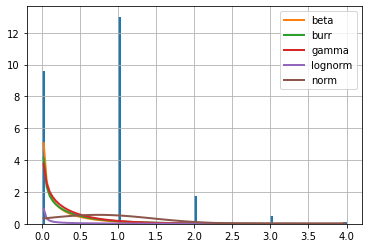

In [70]:
ohs1 = Fitter(ohs1, distributions=['gamma','lognorm', "beta", "burr","norm"])                         
ohs1.fit()
ohs1.summary()

,sumsquare_error,aic,bic,kl_div
lognorm,179.626024,334.398364,-6047.827117,inf
gamma,179.626464,334.158969,-6047.821338,inf
norm,179.632656,331.876776,-6055.505625,inf
burr,179.664911,340.657485,-6039.551117,inf
beta,179.855754,318.359044,-6037.047745,inf


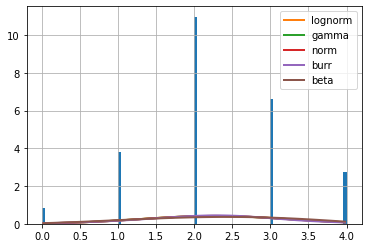

In [71]:
ohs2 = Fitter(ohs2, distributions=['gamma','lognorm', "beta", "burr","norm"])                         
ohs2.fit()
ohs2.summary()

,sumsquare_error,aic,bic,kl_div
norm,223.518109,354.157113,-5540.097598,inf
lognorm,223.576895,368.069924,-5531.711940,inf
gamma,223.578633,367.431617,-5531.693610,inf
beta,223.580843,369.127002,-5523.904732,inf
burr,224.049207,391.198203,-5518.970295,inf


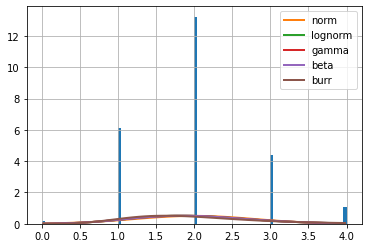

In [72]:
ohs3 = Fitter(ohs3, distributions=['gamma','lognorm', "beta", "burr","norm"])                         
ohs3.fit()
ohs3.summary()

,sumsquare_error,aic,bic,kl_div
burr,156.920352,409.287273,-6358.718547,inf
beta,157.679297,334.494921,-6347.341578,inf
norm,158.005300,331.012563,-6358.002578,inf
gamma,158.031382,331.709737,-6349.847799,inf
lognorm,158.035613,331.605558,-6349.784663,inf


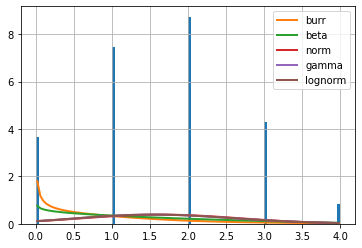

In [73]:
ohs4 = Fitter(ohs4, distributions=['gamma','lognorm', "beta", "burr","norm"])                         
ohs4.fit()
ohs4.summary()

,sumsquare_error,aic,bic,kl_div
burr,131.927049,412.151402,-6767.806221,inf
beta,132.641713,331.223588,-6755.067129,inf
norm,135.090865,317.950529,-6727.456259,inf
lognorm,135.100446,319.918084,-6719.523448,inf
gamma,135.118116,320.048083,-6719.215069,inf


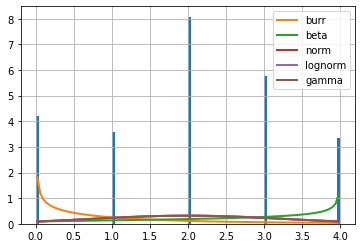

In [74]:
ohs5 = Fitter(ohs5, distributions=['gamma','lognorm', "beta", "burr","norm"])                         
ohs5.fit()
ohs5.summary()

,sumsquare_error,aic,bic,kl_div
beta,159.395477,289.795014,-6321.815792,inf
lognorm,160.341097,323.571323,-6315.633759,inf
norm,160.342880,321.343000,-6323.373118,inf
gamma,160.415813,322.760766,-6314.535237,inf
burr,160.996955,304.469960,-6298.242722,inf


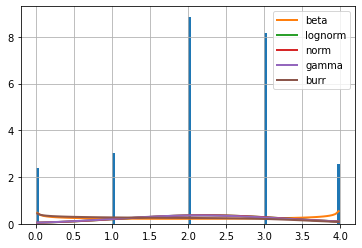

In [75]:
ohs6 = Fitter(ohs6, distributions=['gamma','lognorm', "beta", "burr","norm"])                         
ohs6.fit()
ohs6.summary()

,sumsquare_error,aic,bic,kl_div
lognorm,186.525982,331.827683,-5958.945849,inf
gamma,186.526067,331.763919,-5958.944765,inf
norm,186.526730,329.662013,-5966.701962,inf
burr,186.540246,335.659923,-5950.999964,inf
beta,186.569834,328.155849,-5950.625980,inf


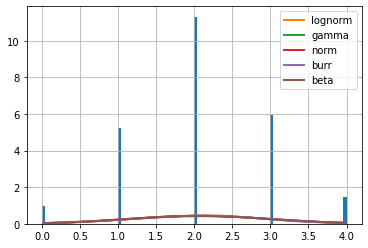

In [76]:
ohs7 = Fitter(ohs7, distributions=['gamma','lognorm', "beta", "burr","norm"])                         
ohs7.fit()
ohs7.summary()

,sumsquare_error,aic,bic,kl_div
beta,188.438497,331.064723,-5927.125997,inf
gamma,188.503395,338.165598,-5934.079612,inf
lognorm,188.524924,338.993149,-5933.810325,inf
burr,188.602957,334.333933,-5925.068947,inf
norm,188.660082,336.477668,-5939.885996,inf


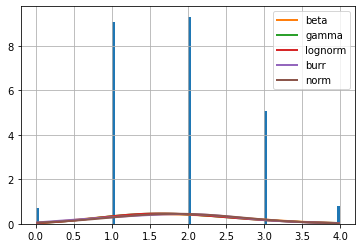

In [77]:
ohs8 = Fitter(ohs8, distributions=['gamma','lognorm', "beta", "burr","norm"])                         
ohs8.fit()
ohs8.summary()

,sumsquare_error,aic,bic,kl_div
gamma,130.841241,850.437462,-6795.059284,inf
burr,166.088989,496.419540,-6224.818673,inf
lognorm,193.935497,786.816594,-5867.089789,inf
beta,198.714912,376.136398,-5801.917338,inf
norm,218.676620,489.067406,-5591.734058,inf


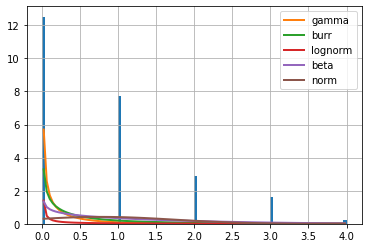

In [78]:
ohs9 = Fitter(ohs9, distributions=['gamma','lognorm', "beta", "burr","norm"])                         
ohs9.fit()
ohs9.summary()

,sumsquare_error,aic,bic,kl_div
beta,128.644508,479.844057,-6827.218993,inf
burr,132.370081,465.856717,-6759.900937,inf
gamma,141.580585,414.135051,-6609.049937,inf
norm,148.146057,329.327091,-6509.928319,inf
lognorm,148.201789,338.291530,-6501.275844,inf


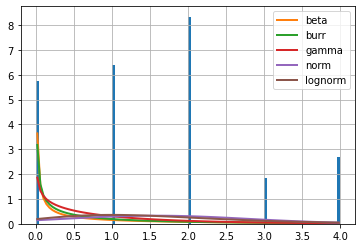

In [79]:
ohs10 = Fitter(ohs10, distributions=['gamma','lognorm', "beta", "burr","norm"])                         
ohs10.fit()
ohs10.summary()

,sumsquare_error,aic,bic,kl_div
beta,181.947133,312.094041,-6009.786890,inf
lognorm,182.892923,351.802843,-6005.326948,inf
gamma,182.909078,349.901700,-6005.118677,inf
norm,182.986348,359.838818,-6011.888323,inf
burr,183.182827,427.681136,-5993.826672,inf


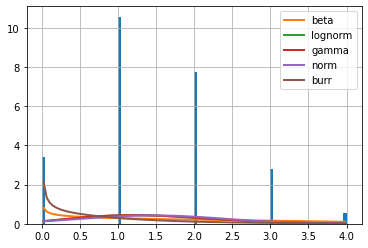

In [80]:
ohs11 = Fitter(ohs11, distributions=['gamma','lognorm', "beta", "burr","norm"])                         
ohs11.fit()
ohs11.summary()

,sumsquare_error,aic,bic,kl_div
burr,130.206900,476.278929,-6798.753517,inf
lognorm,131.512453,672.722242,-6782.993743,inf
gamma,135.194208,512.807493,-6717.887527,inf
beta,143.128424,389.212528,-6575.645277,inf
norm,167.222062,370.088549,-6224.317970,inf


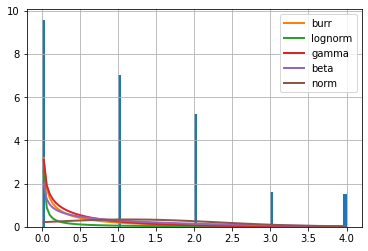

In [81]:
ohs12 = Fitter(ohs12, distributions=['gamma','lognorm', "beta", "burr","norm"])                         
ohs12.fit()
ohs12.summary()

In [ ]:
f.get_best(method = 'sumsquare_error')
f.fitted_param["beta"]